In [2]:
# Graphs were generated based on stack overflow top answer at link below
# link: https://stackoverflow.com/questions/27426668/row-titles-for-matplotlib-subplot
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
ga_curve = pd.read_csv(os.path.join('algo_results','ga_curves_queen_size_100_iteration_5.csv'))
sa_curve = pd.read_csv(os.path.join('algo_results','sa_curves_queen_size_100_iteration_5.csv'))
rhc_curve = pd.read_csv(os.path.join('algo_results','rhc_curves_queen_size_100_iteration_5.csv'))
mimic_curve = pd.read_csv(os.path.join('algo_results','mimic_curves_queen_size_100_iteration_5.csv'))

In [4]:
def plot_ga(ga_curve, x_name='Iteration',y_name='FEvals',pop_size=200, axs=None):
        if axs == None:
                _,axs = plt.subplots()
        x = ga_curve[(ga_curve['Population Size']==pop_size) & (ga_curve['Mutation Rate']==0.25)][x_name]
        y = ga_curve[(ga_curve['Population Size']==pop_size) & (ga_curve['Mutation Rate']==0.25)][y_name]
        axs.plot(x,y)
        x = ga_curve[(ga_curve['Population Size']==pop_size) & (ga_curve['Mutation Rate']==0.5)][x_name]
        y = ga_curve[(ga_curve['Population Size']==pop_size) & (ga_curve['Mutation Rate']==0.5)][y_name]
        axs.plot(x,y)
        x = ga_curve[(ga_curve['Population Size']==pop_size) & (ga_curve['Mutation Rate']==0.75)][x_name]
        y = ga_curve[(ga_curve['Population Size']==pop_size) & (ga_curve['Mutation Rate']==0.75)][y_name]
        line = axs.plot(x,y)
        axs.set_xlabel(x_name, fontsize = 15)
        axs.set_ylabel(y_name, fontsize = 15)
        axs.set_title(f"Iteration vs {y_name}", fontsize = 15)
        axs.legend(['muta_rate=0.25','muta_rate=0.5','muta_rate=0.75'])
        axs.tick_params(axis='both', which='major', labelsize=15)
        axs.tick_params(axis='both', which='minor', labelsize=15)

        return line


In [5]:
def graph_genetic_algo(problem_name='flip_flop', population_size=400):
    problem_size = [10, 20, 40, 60, 100]
    fig, axs = plt.subplots(nrows=len(problem_size), ncols=1, figsize=(10,15), constrained_layout=True)
    fig.suptitle(f'Genetic Algorithm: {problem_name} problem: Population Size {population_size}',fontsize=20)
    count = 1
    # clear subplots
    for ax in axs:
        ax.remove()

    # add subfigure per subplot
    gridspec = axs[0].get_subplotspec().get_gridspec()
    subfigs = [fig.add_subfigure(gs) for gs in gridspec]
    problem_count = 0
    for row, subfig in enumerate(subfigs):
        size = problem_size[problem_count]
        subfig.suptitle(f'Problem Size: {size}', fontsize=15)
        # create 1x3 subplots per subfig
        axs = subfig.subplots(nrows=1, ncols=3)
        ga_curve = pd.read_csv(os.path.join('algo_results',f'ga_curves_{problem_name}_size_{size}_iteration_{count}.csv'))
        y_name_lst = ['FEvals', 'Fitness', 'Time']
        name_count = 0
        for col, ax in enumerate(axs):
            y_name= y_name_lst[name_count]
            pop_size= population_size
            plot_ga(
                ga_curve=ga_curve,y_name=y_name, 
                pop_size=pop_size, axs=ax
            )
            ax.set_title(f'{y_name}',fontsize=15)
            name_count = name_count+1
        count = count + 1
        problem_count = problem_count + 1

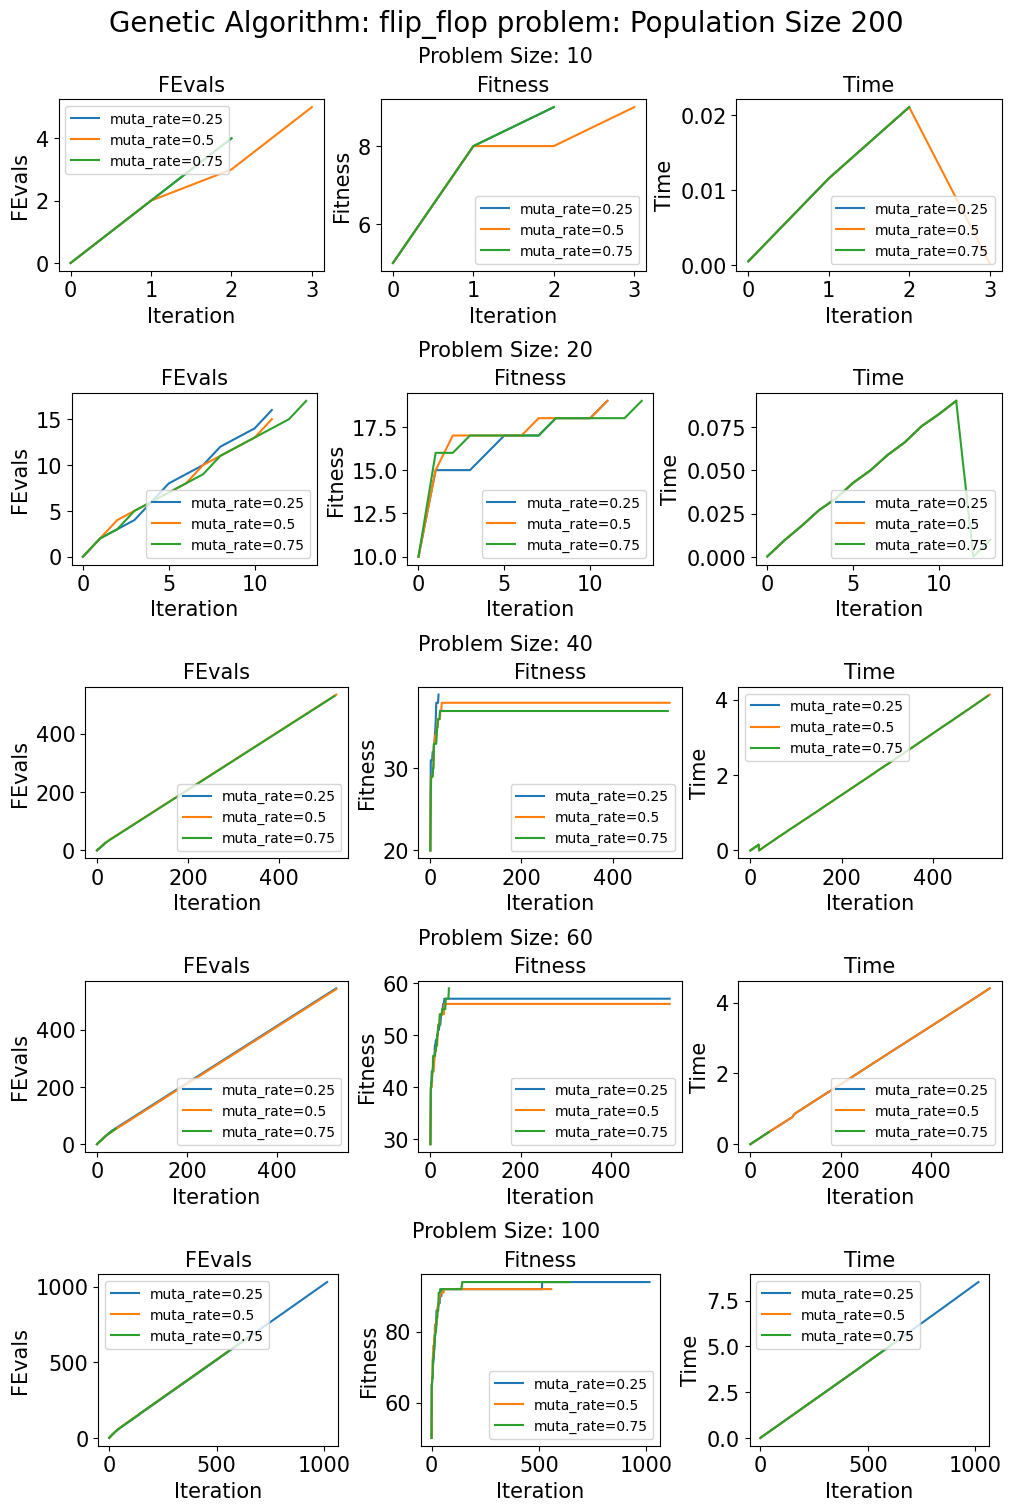

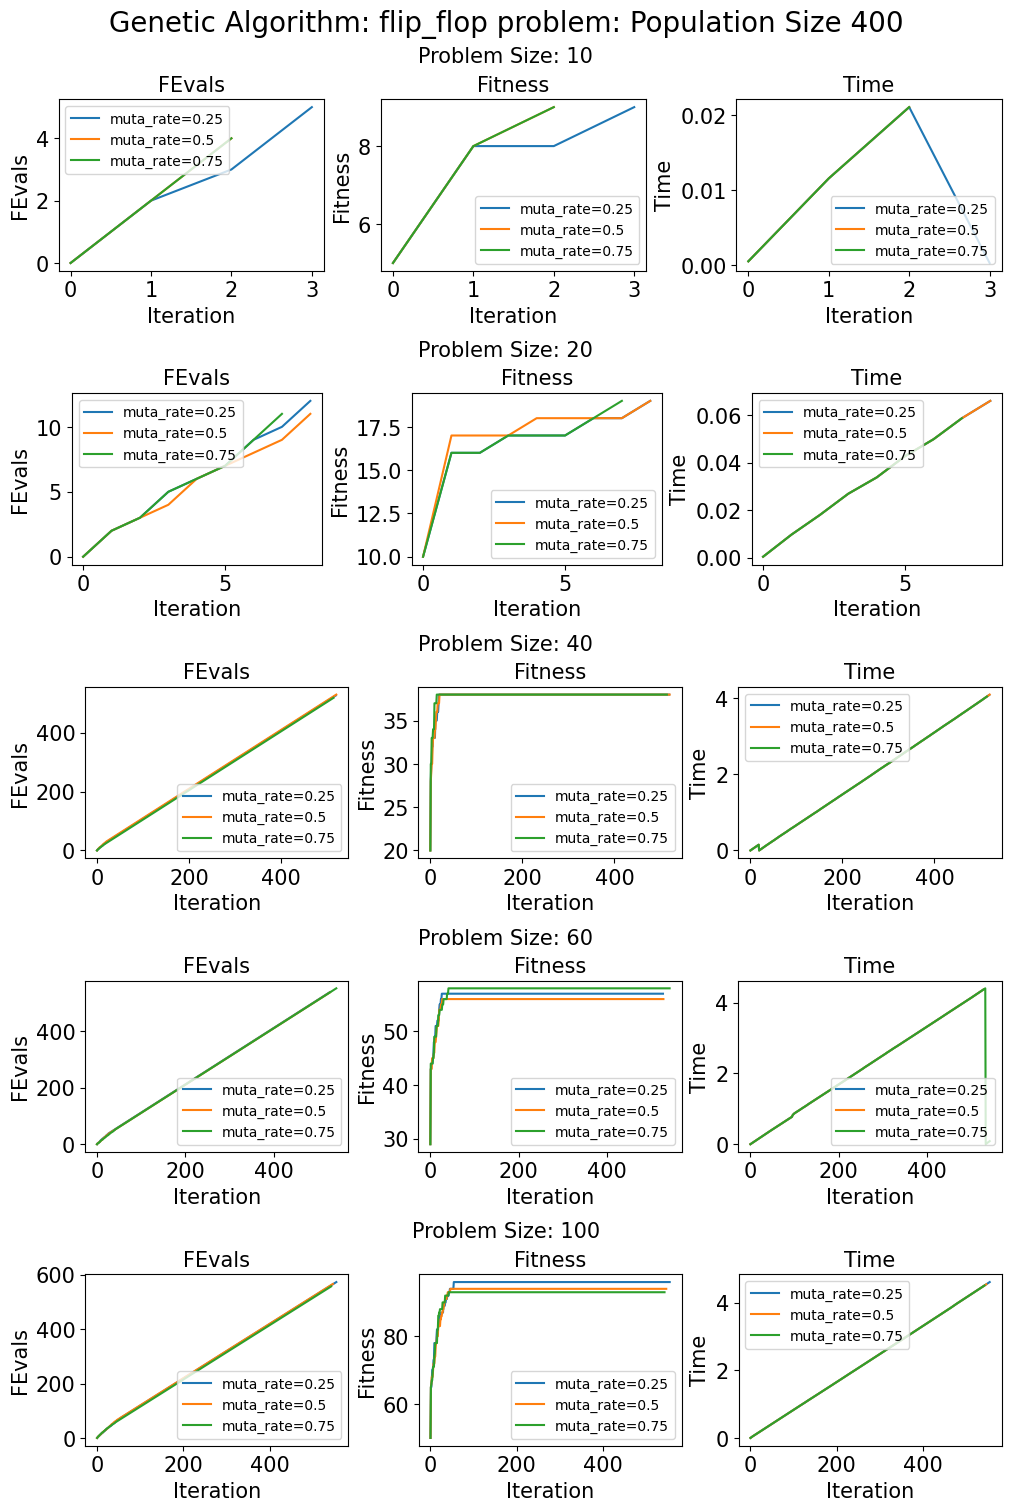

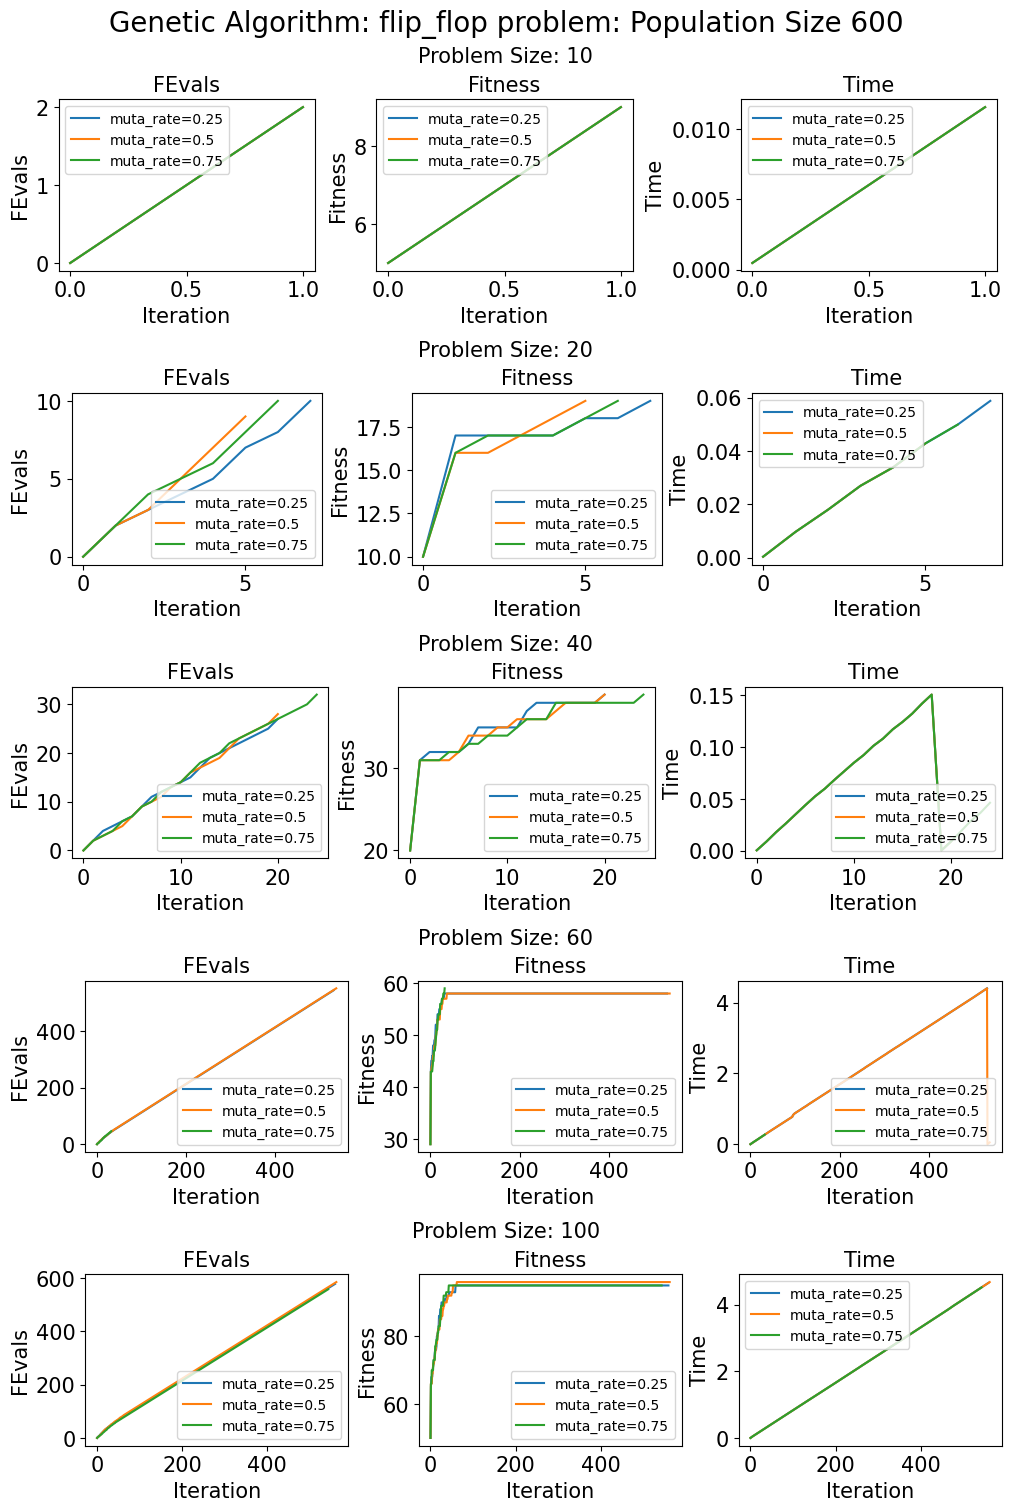

In [123]:
graph_genetic_algo(problem_name='flip_flop', population_size=200)
graph_genetic_algo(problem_name='flip_flop', population_size=400)
graph_genetic_algo(problem_name='flip_flop', population_size=600)

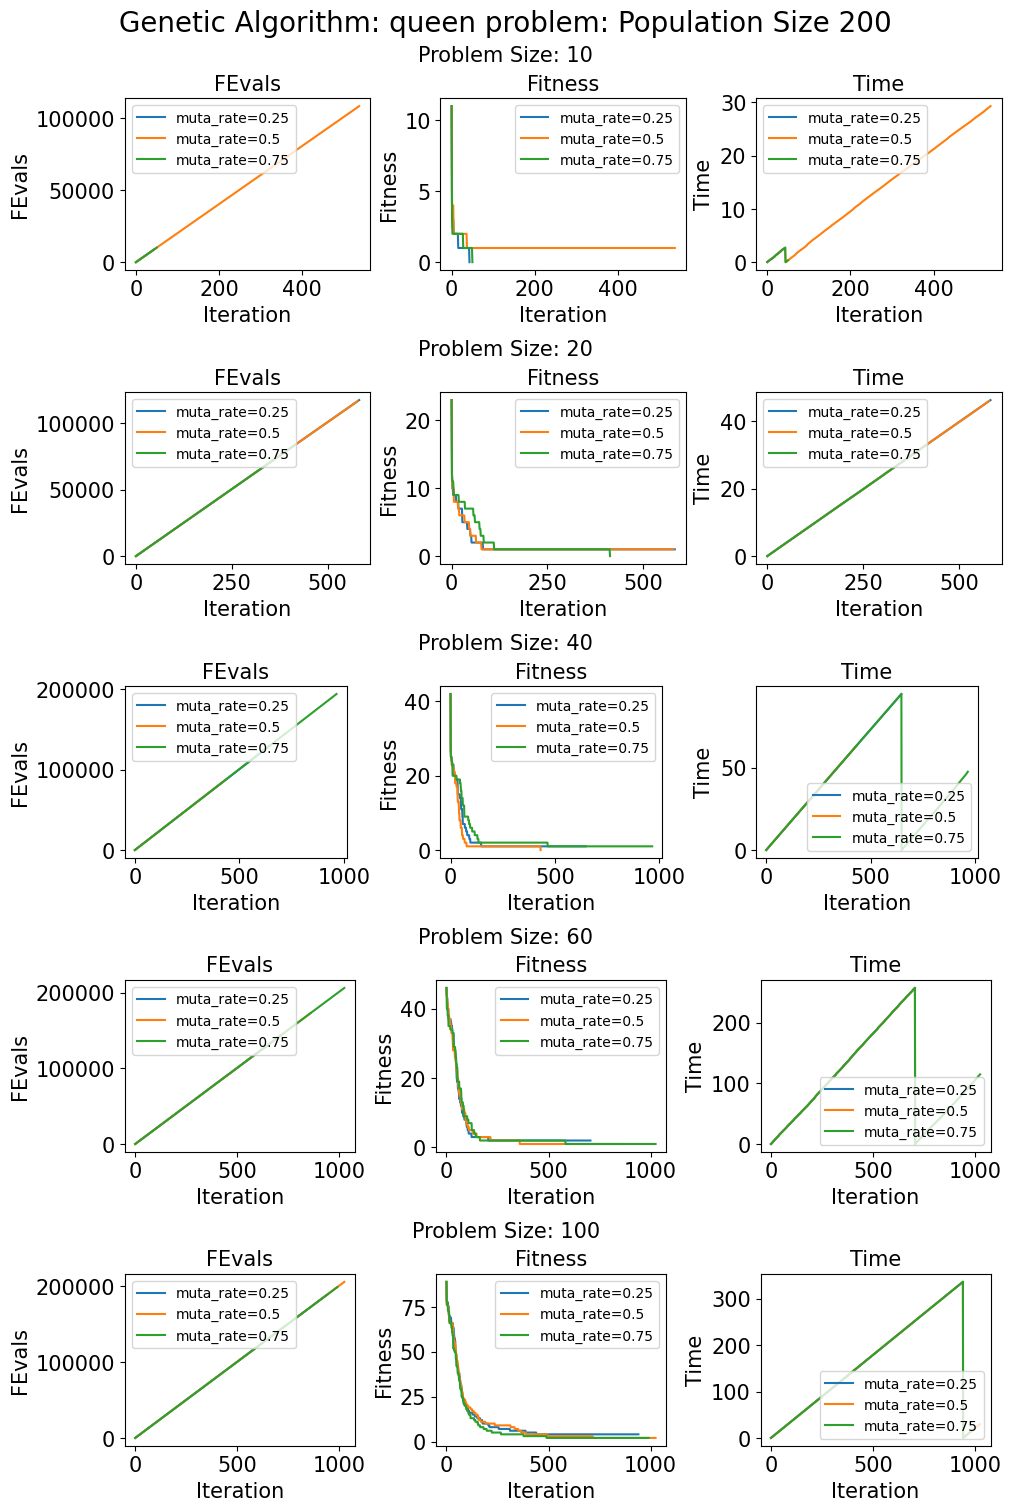

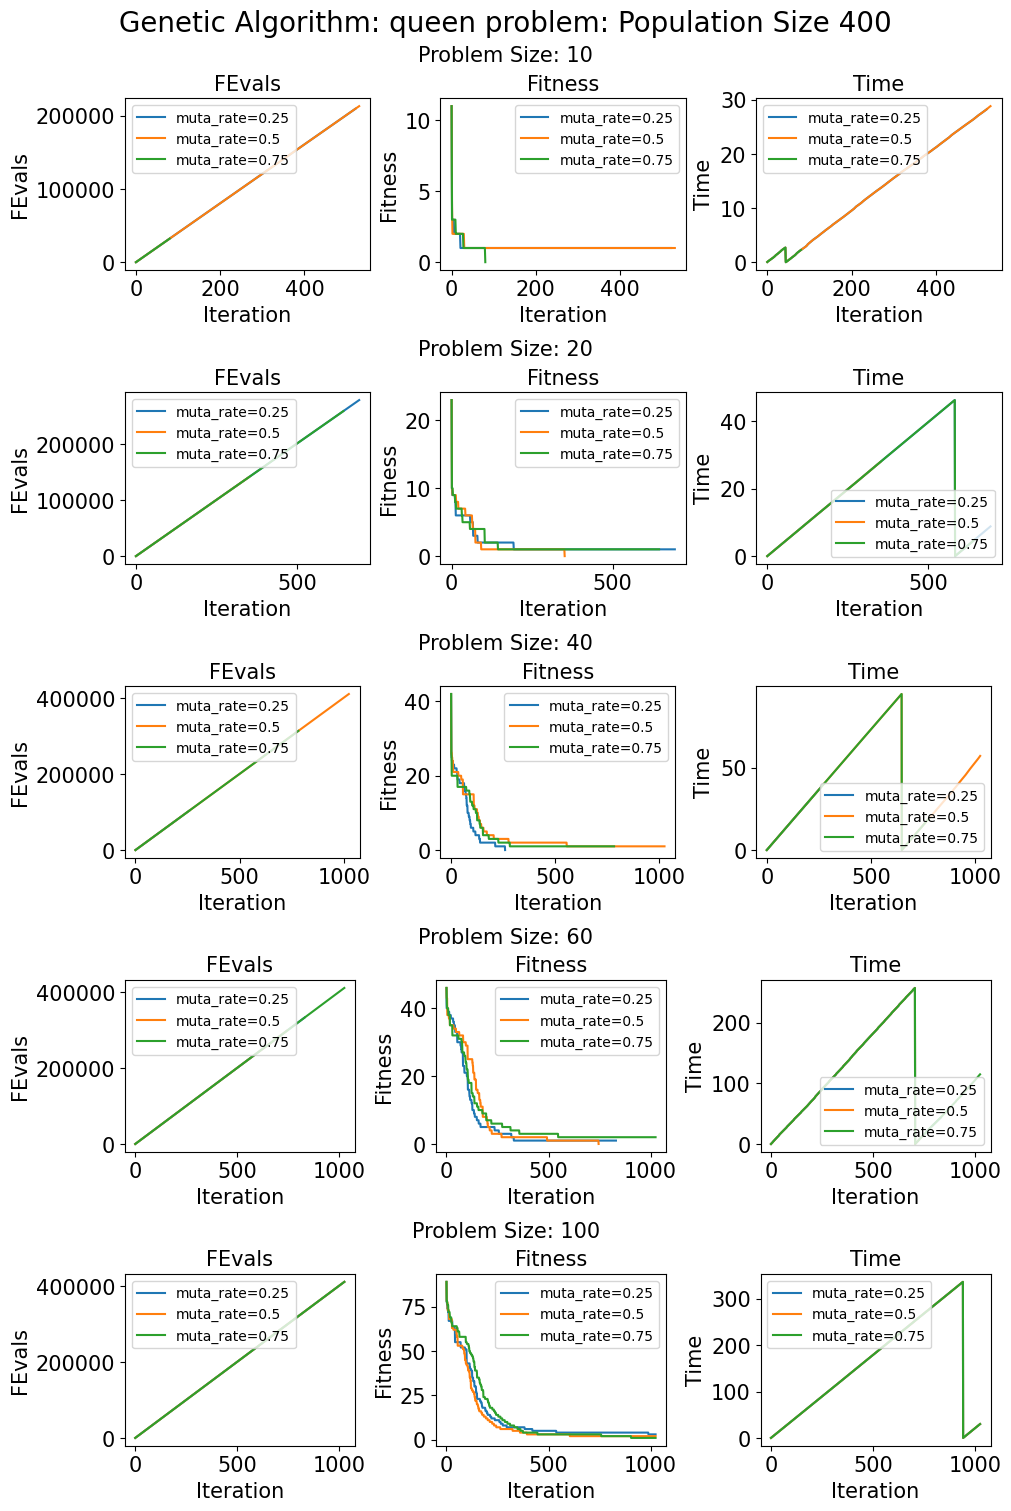

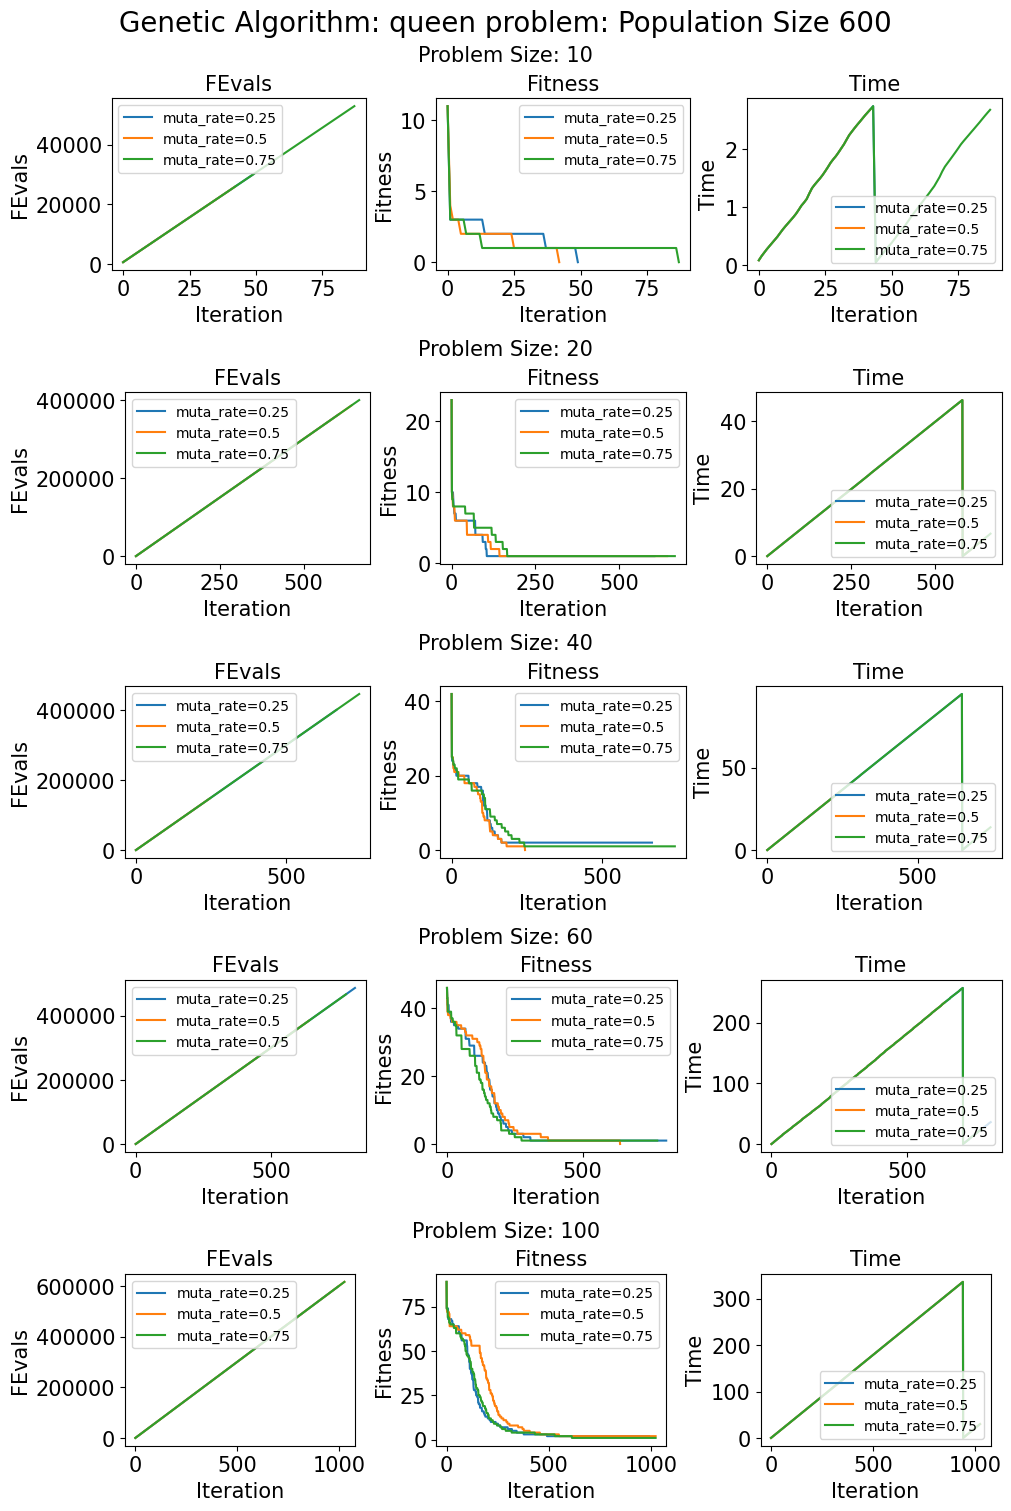

In [121]:
graph_genetic_algo(problem_name='queen', population_size=200)
graph_genetic_algo(problem_name='queen', population_size=400)
graph_genetic_algo(problem_name='queen', population_size=600)

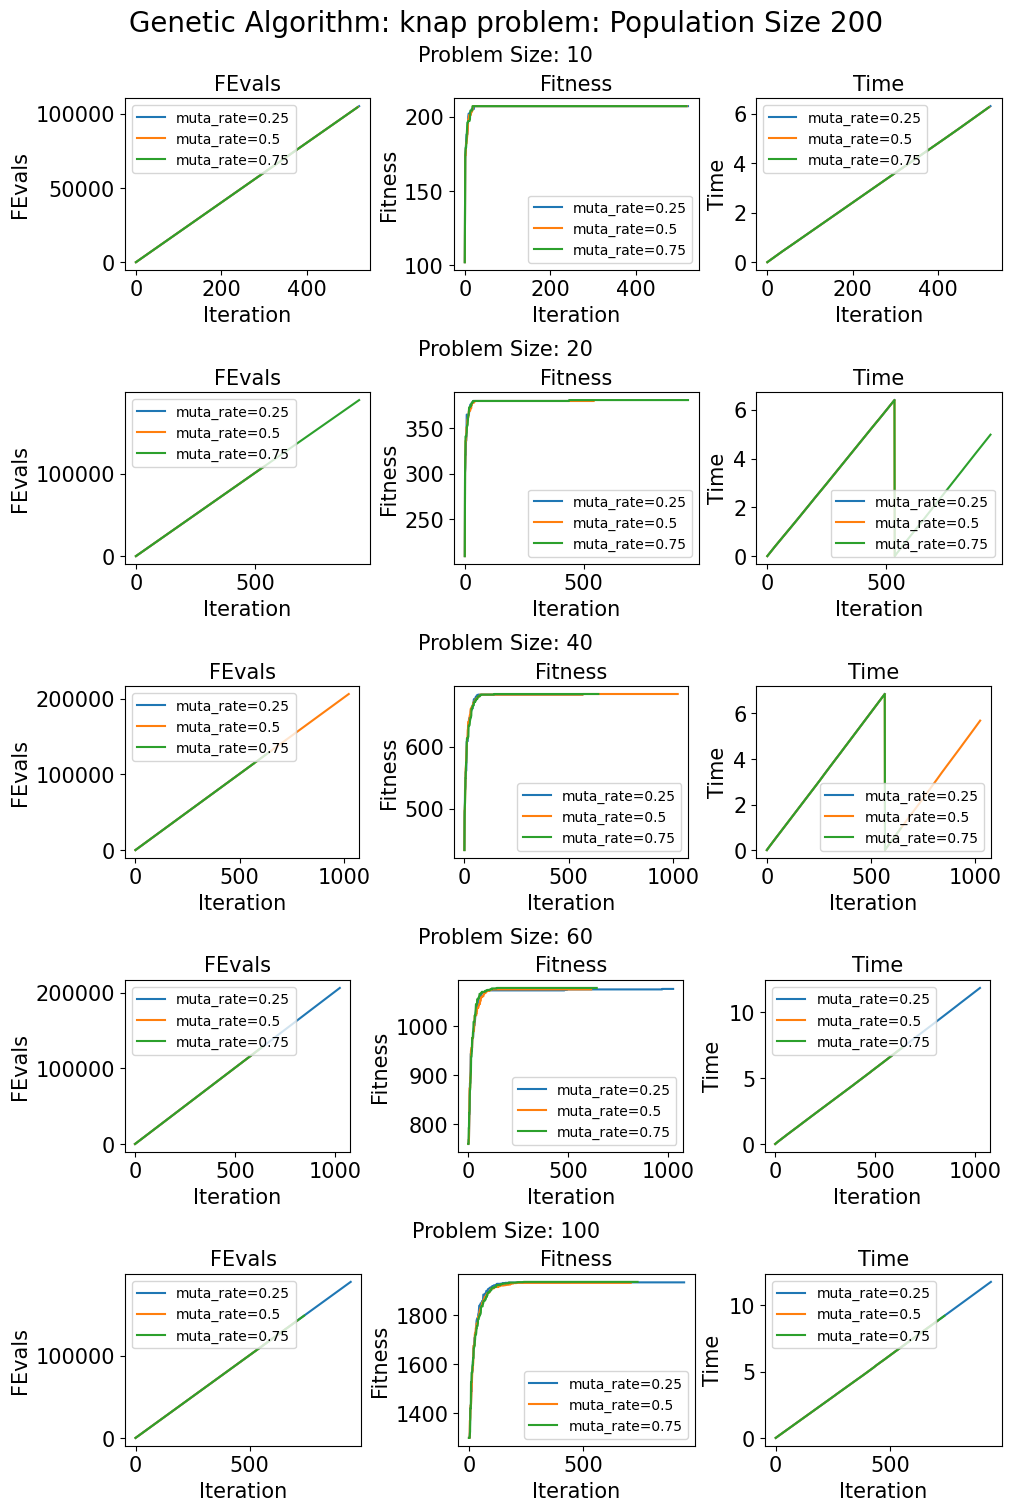

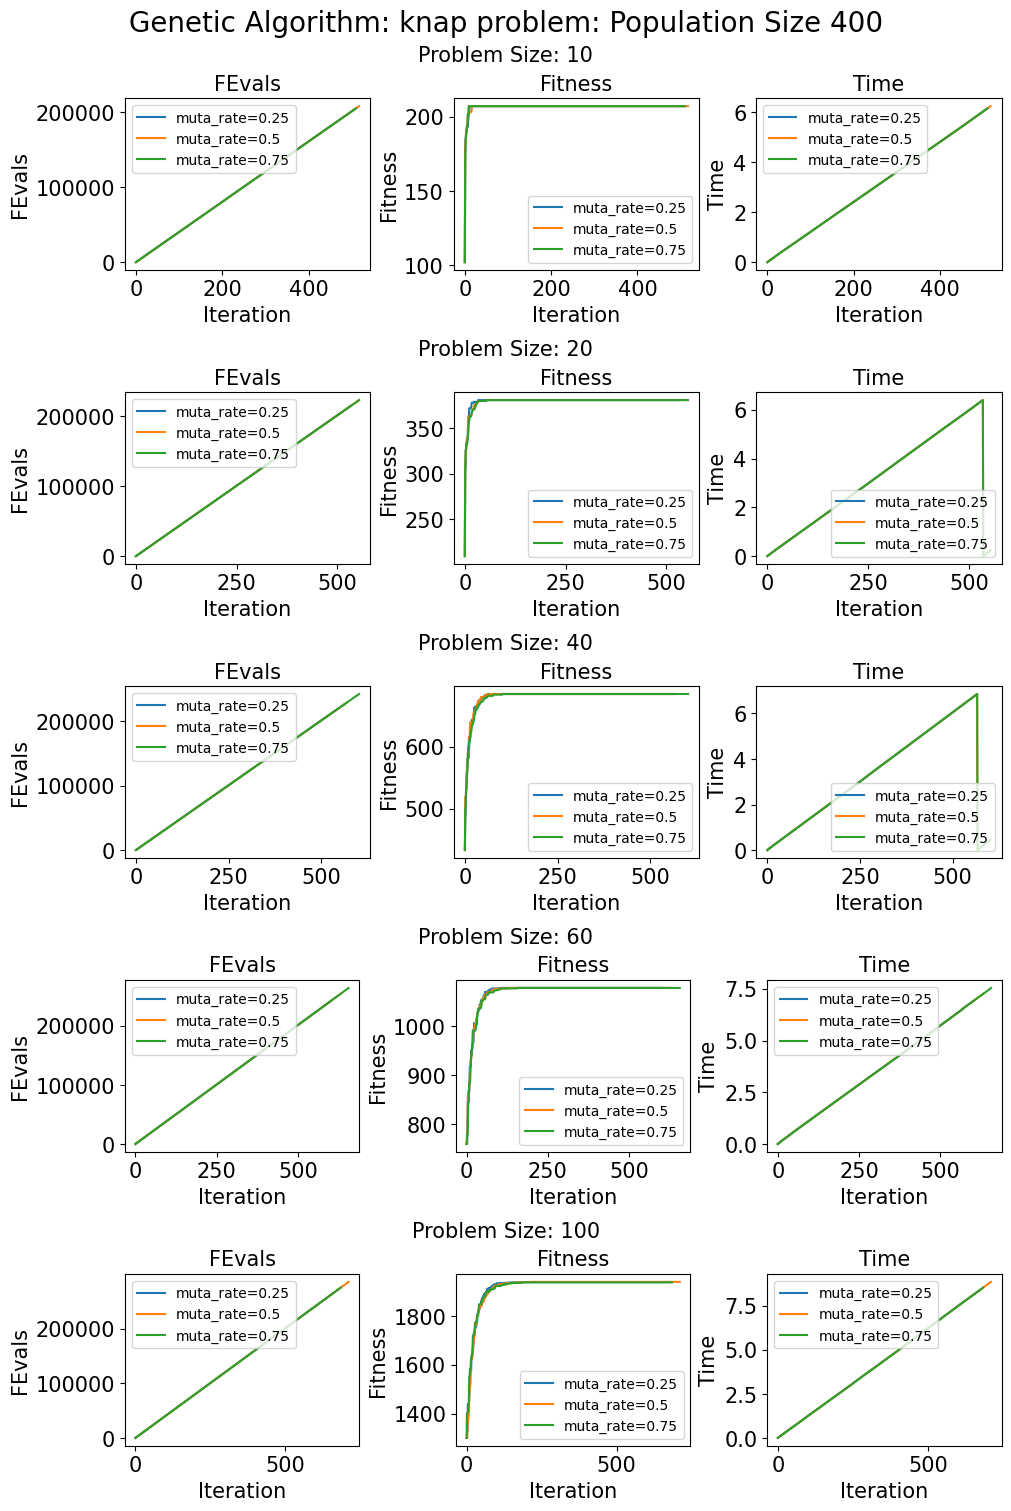

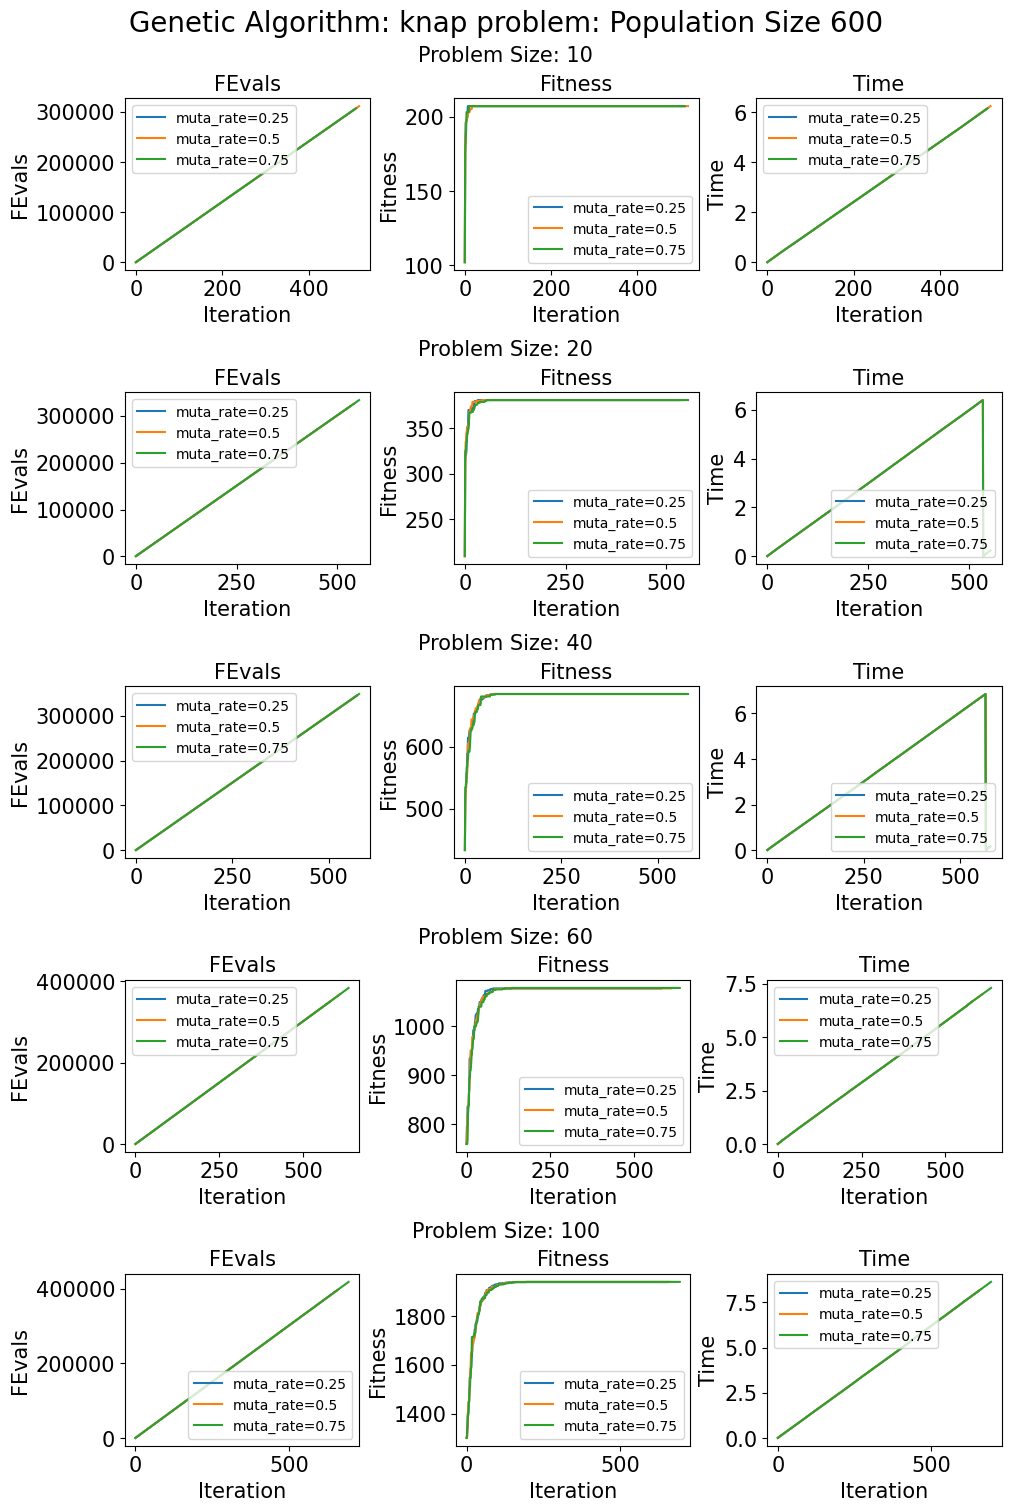

In [122]:
graph_genetic_algo(problem_name='knap', population_size=200)
graph_genetic_algo(problem_name='knap', population_size=400)
graph_genetic_algo(problem_name='knap', population_size=600)

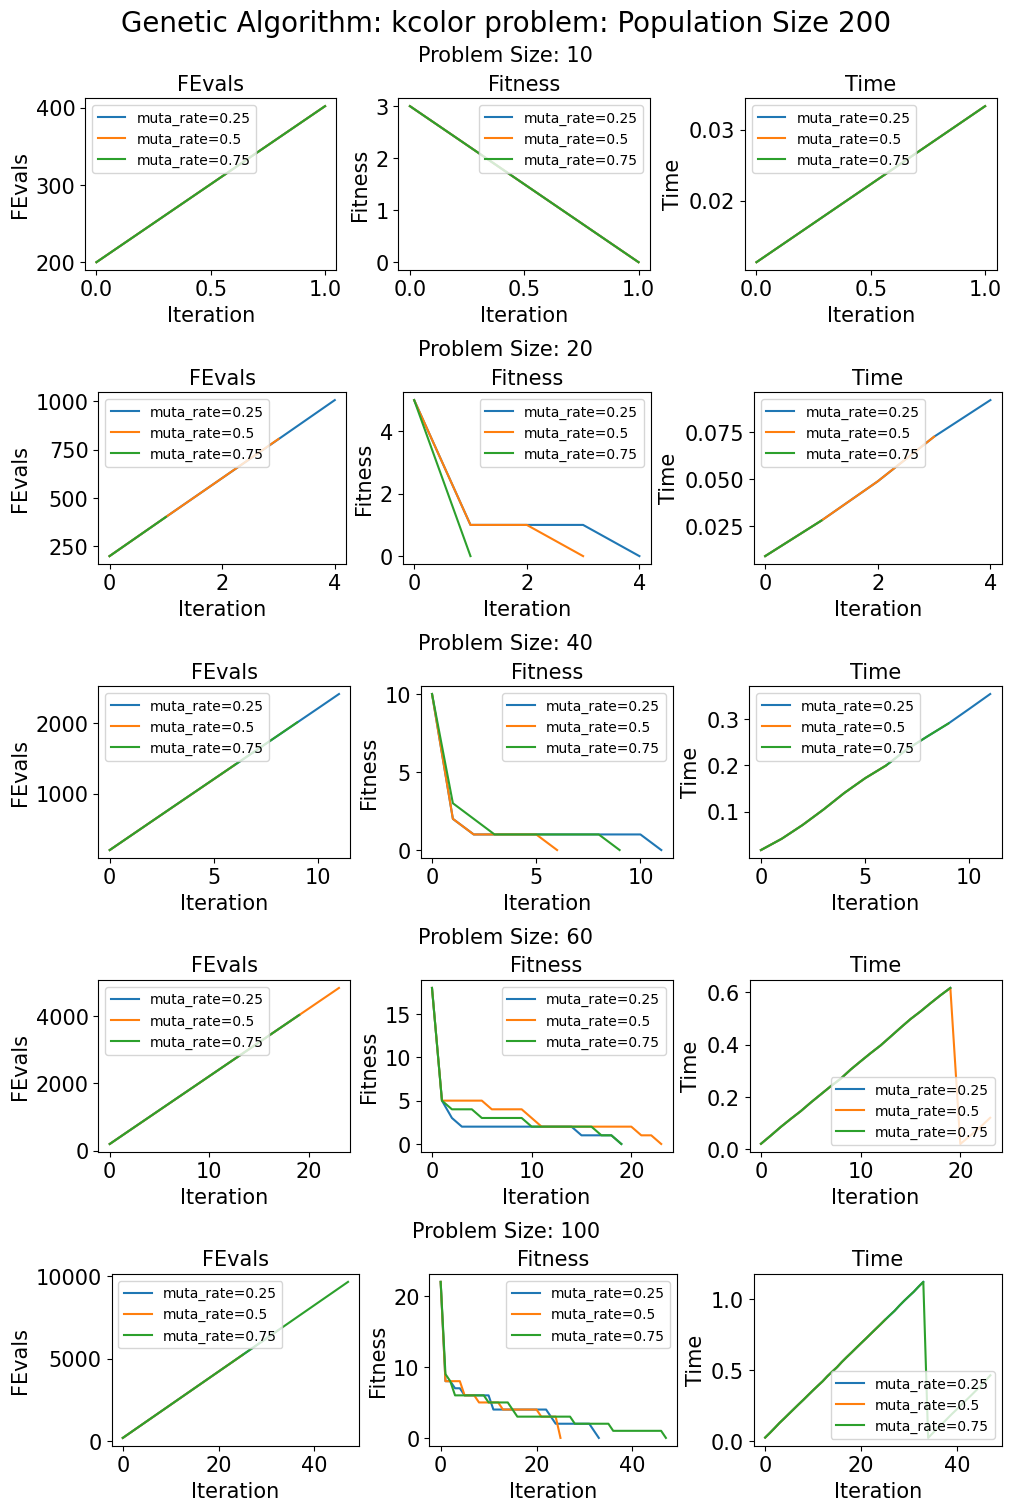

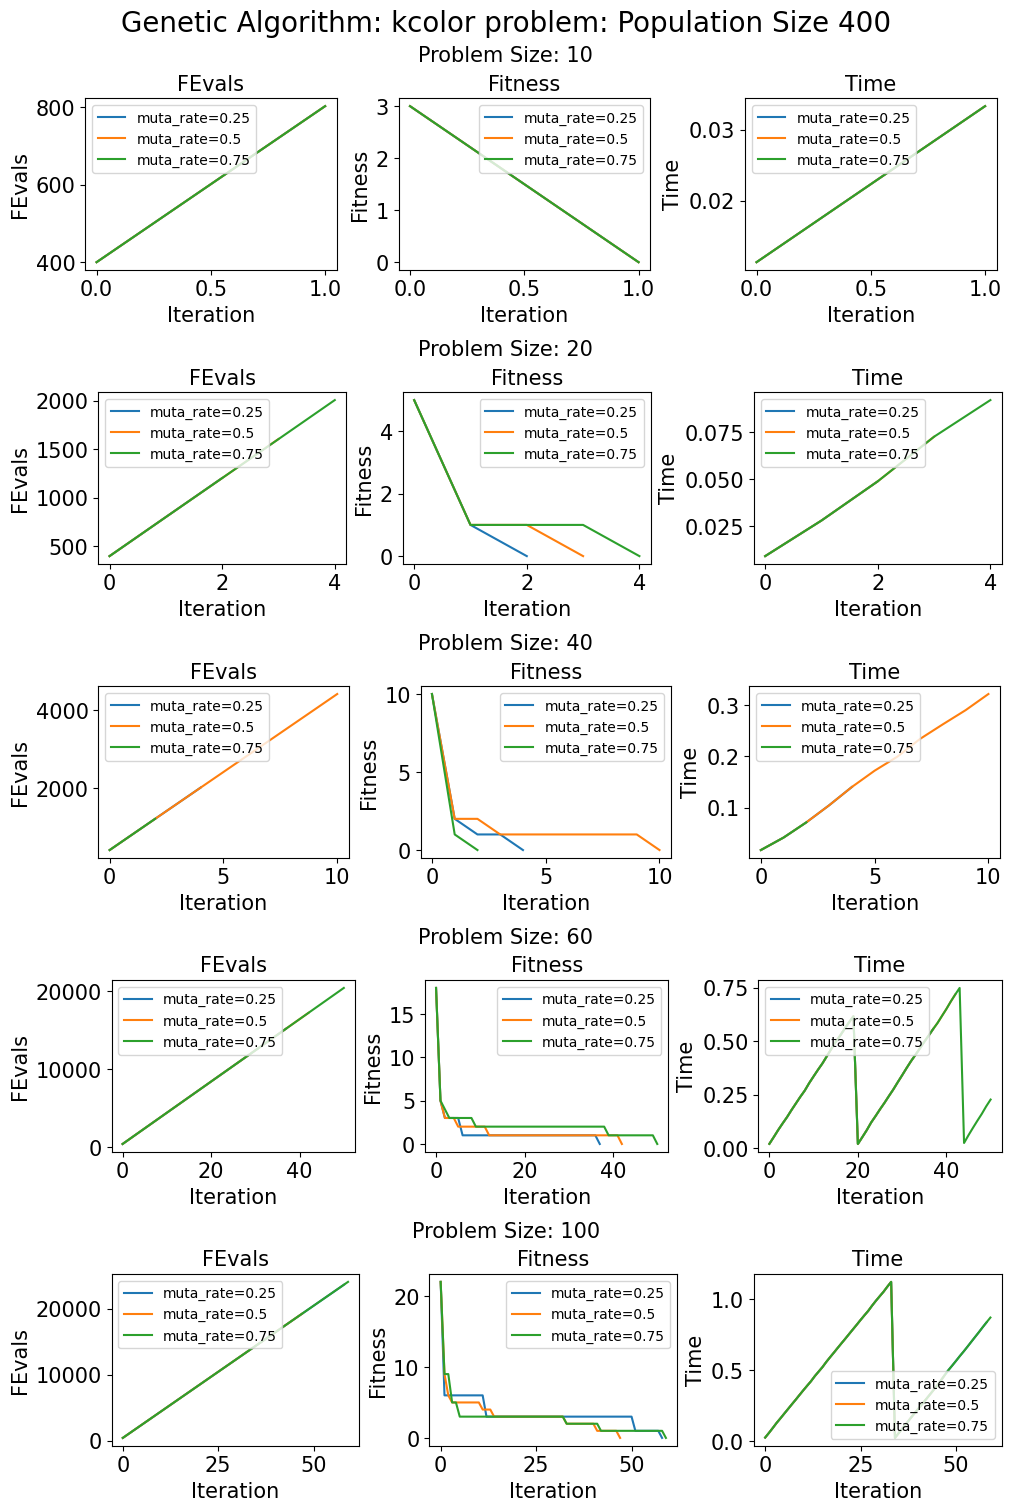

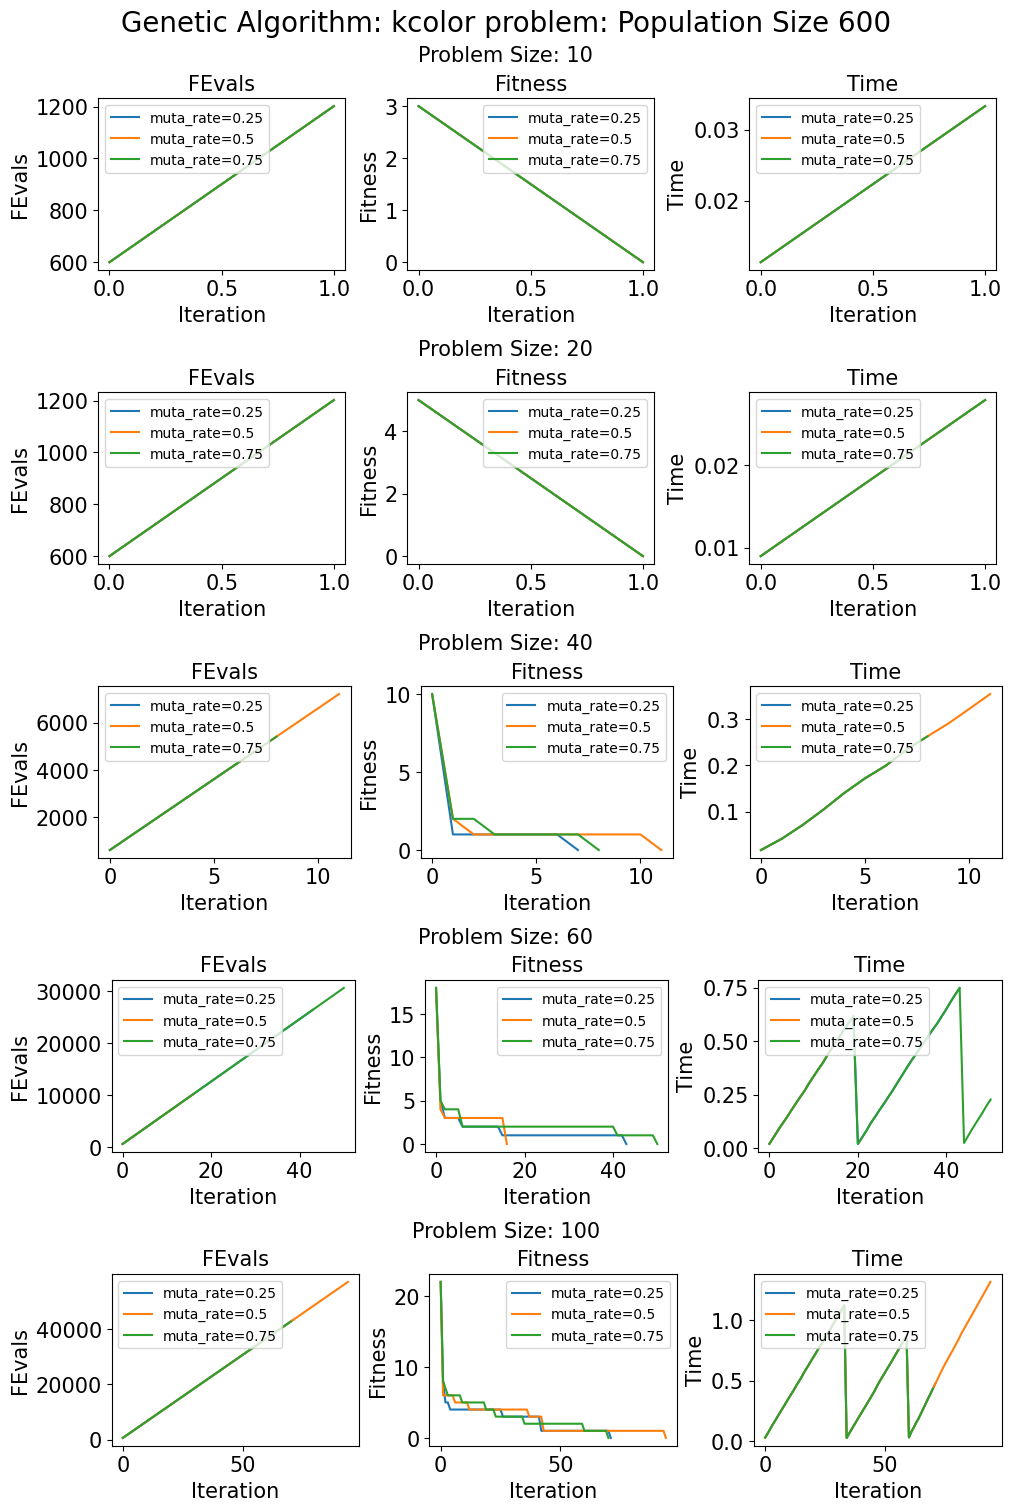

In [6]:
graph_genetic_algo(problem_name='kcolor', population_size=200)
graph_genetic_algo(problem_name='kcolor', population_size=400)
graph_genetic_algo(problem_name='kcolor', population_size=600)